In [60]:
import pandas as pd
import zipfile
import kaggle
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import geopandas as gpd

In [3]:
!kaggle datasets download -d sobhanmoosavi/us-accidents

us-accidents.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
zipfile_name = 'us-accidents.zip'
with zipfile.ZipFile(zipfile_name, 'r') as file:
    file.extractall()

In [2]:
df = pd.read_csv('US_Accidents_March23.csv')

In [3]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [4]:
df.shape

(7728394, 46)

## Preprocessing and Cleaning

In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

In [7]:
df.dropna(thresh=40)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.010,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.010,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,A-7777757,Source1,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.99888,-117.37094,0.543,...,False,False,False,False,False,False,Day,Day,Day,Day
7728390,A-7777758,Source1,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.76555,-117.15363,0.338,...,False,False,False,False,False,False,Day,Day,Day,Day
7728391,A-7777759,Source1,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.77740,-117.85727,0.561,...,False,False,False,False,False,False,Day,Day,Day,Day
7728392,A-7777760,Source1,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.98311,-118.39565,0.772,...,False,False,False,False,False,False,Day,Day,Day,Day


In [8]:
df.fillna(method='ffill', limit=5, inplace=True)
df.fillna(method='bfill', limit=5, inplace=True)

In [9]:
df.isna().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402757
End_Lng                  3402757
Distance(mi)                   0
Description                    0
Street                         0
City                           0
County                         0
State                          0
Zipcode                        0
Country                        0
Timezone                       0
Airport_Code                   0
Weather_Timestamp           4024
Temperature(F)              4035
Wind_Chill(F)            1417136
Humidity(%)                 4068
Pressure(in)                4033
Visibility(mi)              4032
Wind_Direction              4040
Wind_Speed(mph)            11197
Precipitation(in)        1368847
Weather_Condition           4024
Amenity                        0
Bump      

In [10]:
df.drop(columns=['End_Lat', 'End_Lng'],inplace= True)
df.dropna(subset=['Wind_Chill(F)','Wind_Speed(mph)','Precipitation(in)'],inplace = True)

In [11]:
df.isnull().sum()

ID                       0
Source                   0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
Distance(mi)             0
Description              0
Street                   0
City                     0
County                   0
State                    0
Zipcode                  0
Country                  0
Timezone                 0
Airport_Code             0
Weather_Timestamp        0
Temperature(F)           0
Wind_Chill(F)            0
Humidity(%)              0
Pressure(in)             9
Visibility(mi)           7
Wind_Direction           0
Wind_Speed(mph)          0
Precipitation(in)        0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
T

## Exploratory Data Analysis

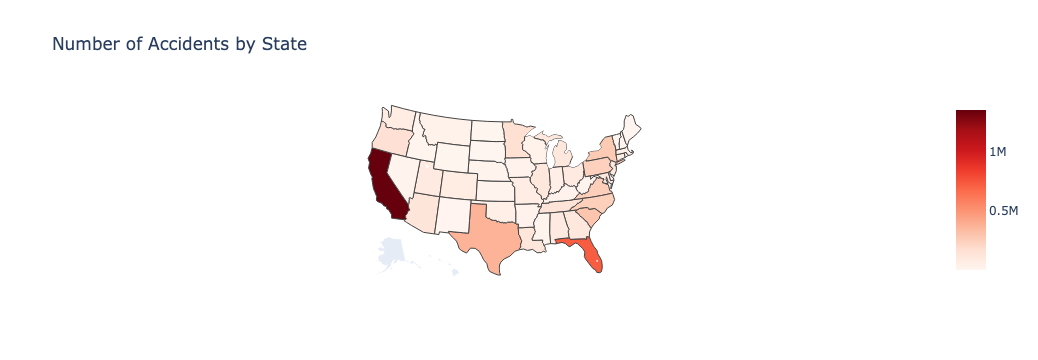

In [35]:
state_counts = df["State"].value_counts()
fig = go.Figure(data=go.Choropleth(locations=state_counts.index, z=state_counts.values.astype(float), locationmode="USA-states", colorscale="Reds"))
fig.update_layout(title_text="Number of Accidents by State", geo_scope="usa")
fig.show()

Text(0.5, 1.0, 'Road Accidents in USA from 2016 to 2020')

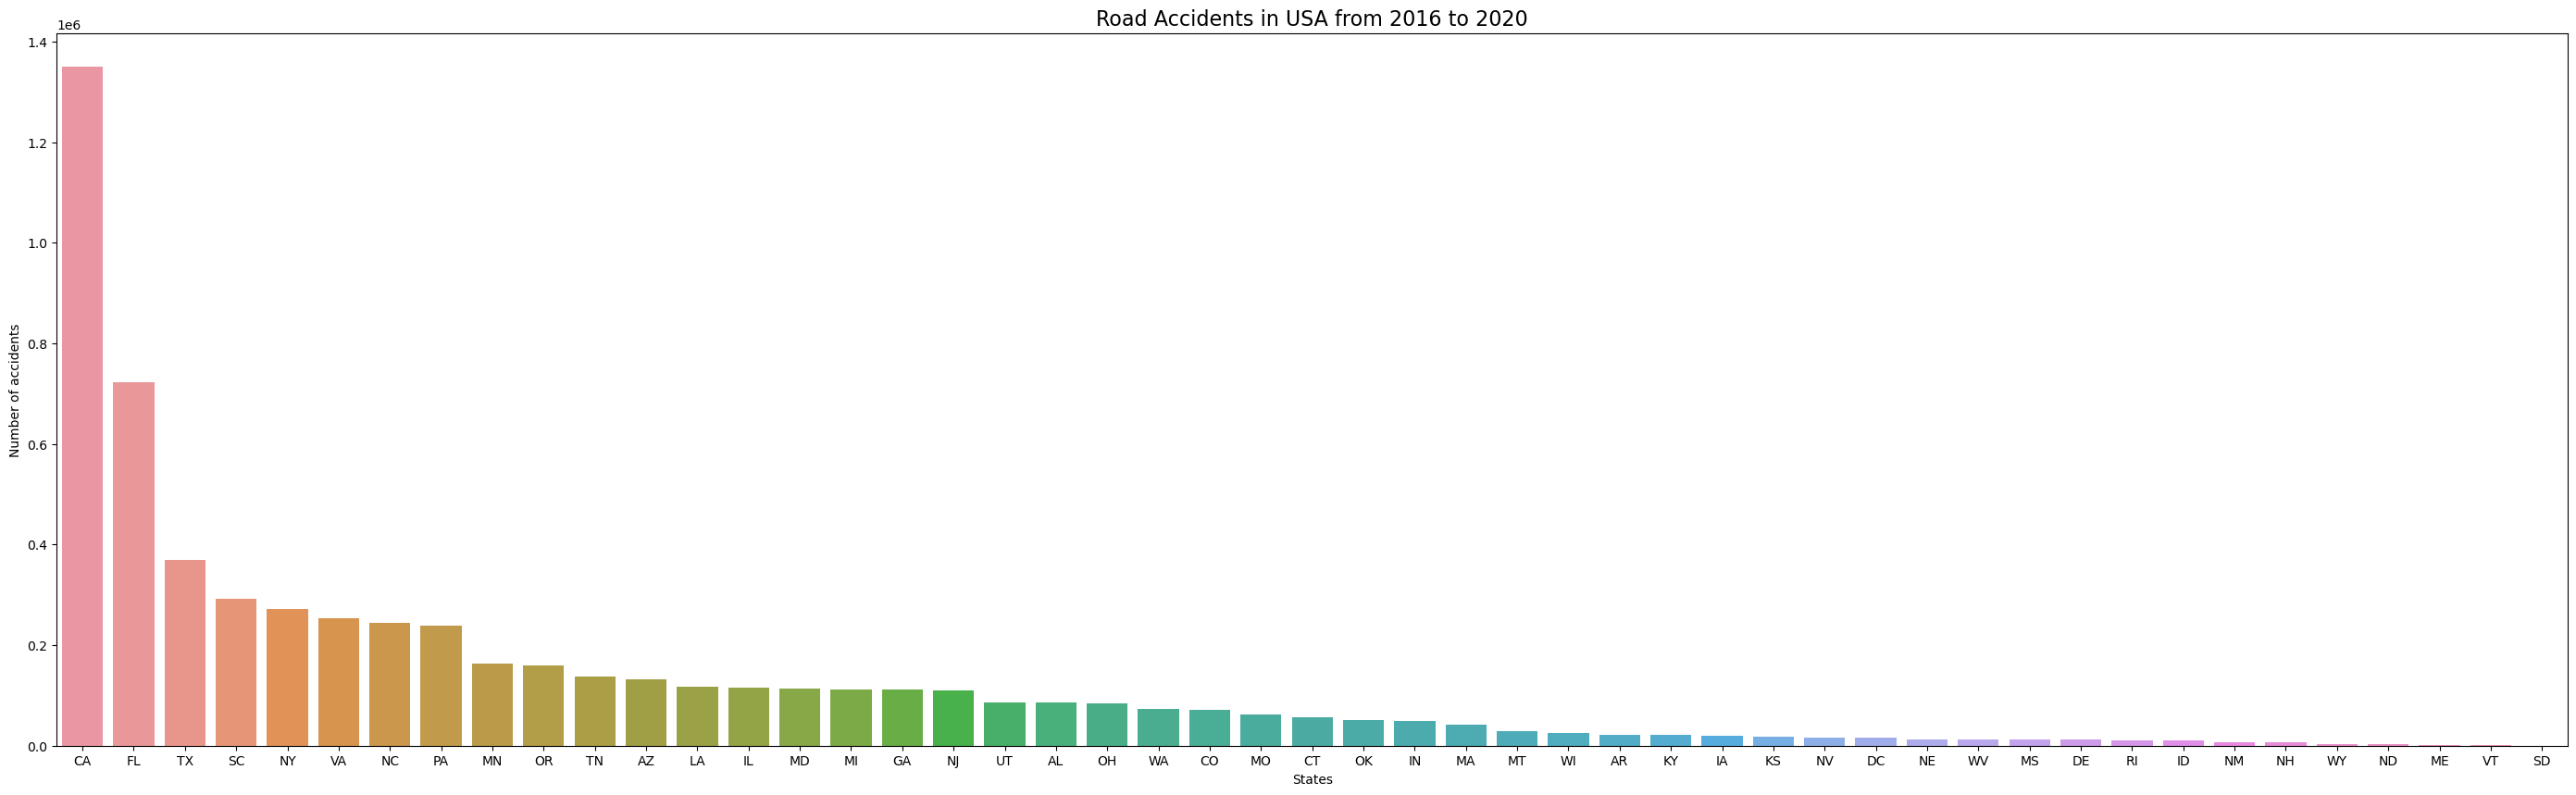

In [25]:
plt.figure(figsize=(35,10))
sns.countplot(x='State', data=df, order=df['State'].value_counts().index)
plt.xlabel('States')
plt.ylabel('Number of accidents')
plt.title('Road Accidents in USA from 2016 to 2020', fontsize = 16)

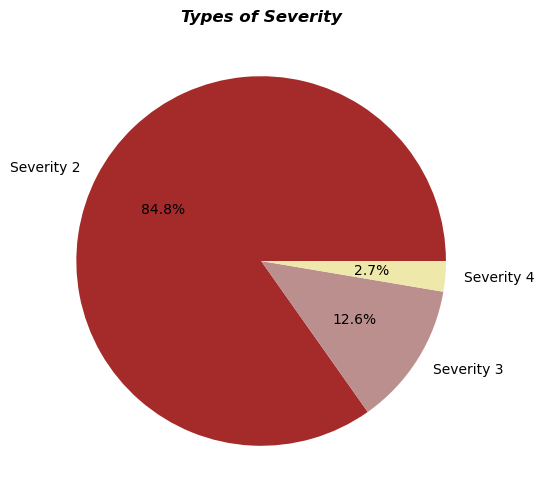

In [41]:
df_sev = df.groupby('Severity').size()
df_sev = df_sev[[2,3,4]]
cols = ['brown', 'rosybrown', 'palegoldenrod']
cases = ['Severity 2','Severity 3','Severity 4']
plt.figure(figsize=(10,6))
plt.pie(df_sev, colors = cols, labels= cases, autopct = ('%1.1f%%'))
plt.title('Types of Severity', weight='heavy', style='italic');

<Axes: title={'center': 'Top 10 Cities where the most accidents occurred (2016-2023) US'}, xlabel='Number of accidents'>

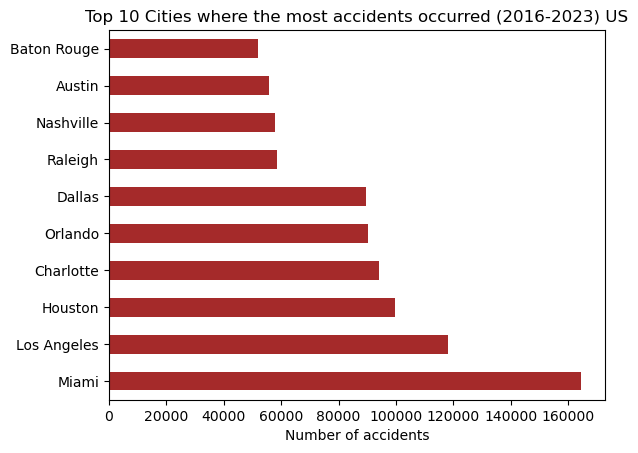

In [48]:
accident_city = df.City.value_counts()
accident_city[:10].plot(kind='barh', xlabel='Number of accidents', title='Top 10 Cities where the most accidents occurred (2016-2023) US', color='brown')
